In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from time import time
import sys

import pyDOE

%load_ext autoreload
%autoreload 2

In [3]:
### FOR DATA REPRODUCTIBILITY
### RANDOMSEED = 2662 ### for grid_LHS 1
RANDOMSEED = 1001 ### for grid_LHS 2
np.random.RandomState( np.random.seed(RANDOMSEED) ) ### fixe the random seed for testing

In [4]:
### PARAMETERS RANGE
range_deltaStar = [ np.log10(20.), np.log10(500.) ] ### in log
#range_espilonSn = [ 0., 1. ] ### in lin, for grid_LHS 1
range_espilonSn = [ np.log10(0.005), np.log10(0.5) ] ### in log
range_espilonSF = [ np.log10(0.001), np.log10(0.03) ] ### lin: [ 0.001, 0.03 ], in log :[ np.log10(0.001), np.log10(0.03) ] = [-3, 1.52]
range_mstar     = [ np.log10(1000) , np.log10(100000) ] ### in log
range_fesc      = [ 0. , 1. ] ### in lin

In [5]:
number_of_param = 5 # 3
number_of_points = 300 # 100
LHS_sample = pyDOE.lhs( number_of_param, samples=number_of_points, criterion='m' ) ### LHS matrix, criterion= c, m, cm, corr

In [6]:
print( LHS_sample.shape )
param_sample = np.zeros( [number_of_points, number_of_param+1] )
param_sample[:,0] = np.arange( number_of_points ) ### ID
param_sample[:,1] = 10**( LHS_sample[:,0] * np.diff( range_deltaStar ) + range_deltaStar[0] )  ### deltaStar
param_sample[:,2] = 10**( LHS_sample[:,1] * np.diff( range_espilonSn ) + range_espilonSn[0] )  ### espilonSn
param_sample[:,3] = 10**( LHS_sample[:,2] * np.diff( range_espilonSF ) + range_espilonSF[0] )  ### espilonSF
param_sample[:,4] = 10**( LHS_sample[:,3] * np.diff( range_mstar     ) + range_mstar[0]  )     ### mstar
param_sample[:,5] = ( LHS_sample[:,4] * np.diff( range_fesc     ) + range_fesc[0]  )           ### fesc

(300, 5)


In [15]:
# file_name = 'SimSuit_LHS_grid.dat'
# header = 'LHS sample of '+ str(number_of_points) +' points \n num delta* epsilon_SN epsilon_SF'
# np.savetxt( file_name, param_sample, header=header, fmt='%.4f' )

file_name = 'SimSuit_LHS_grid_2.dat'
header = 'LHS sample of '+ str(number_of_points) +' points \n num overdensity_cond feedback_eff efficiency mass_res fesc'
np.savetxt( file_name, param_sample, header=header, fmt='%.4f' )

NEF_DATADIR = '/amphora/nicolas.gillet/'
np.savetxt( NEF_DATADIR+file_name, param_sample, header=header, fmt='%.4f' )

In [16]:
def _read_LHS_param( filename="SimSuit_LHS_grid.dat" ):
    DATA = np.loadtxt( filename )
    with open( "SimSuit_LHS_grid_2.dat" ) as f:
        f.readline()
        PARAM = f.readline().split()[2:]
    return DATA, PARAM

In [17]:
DATA, PARAM = _read_LHS_param( filename="SimSuit_LHS_grid_2.dat" )

In [18]:
print( DATA[0,:] )

[  0.00000000e+00   8.67106000e+01   2.39000000e-02   1.90000000e-03
   3.33455840e+03   2.70500000e-01]


<IPython.core.display.Javascript object>


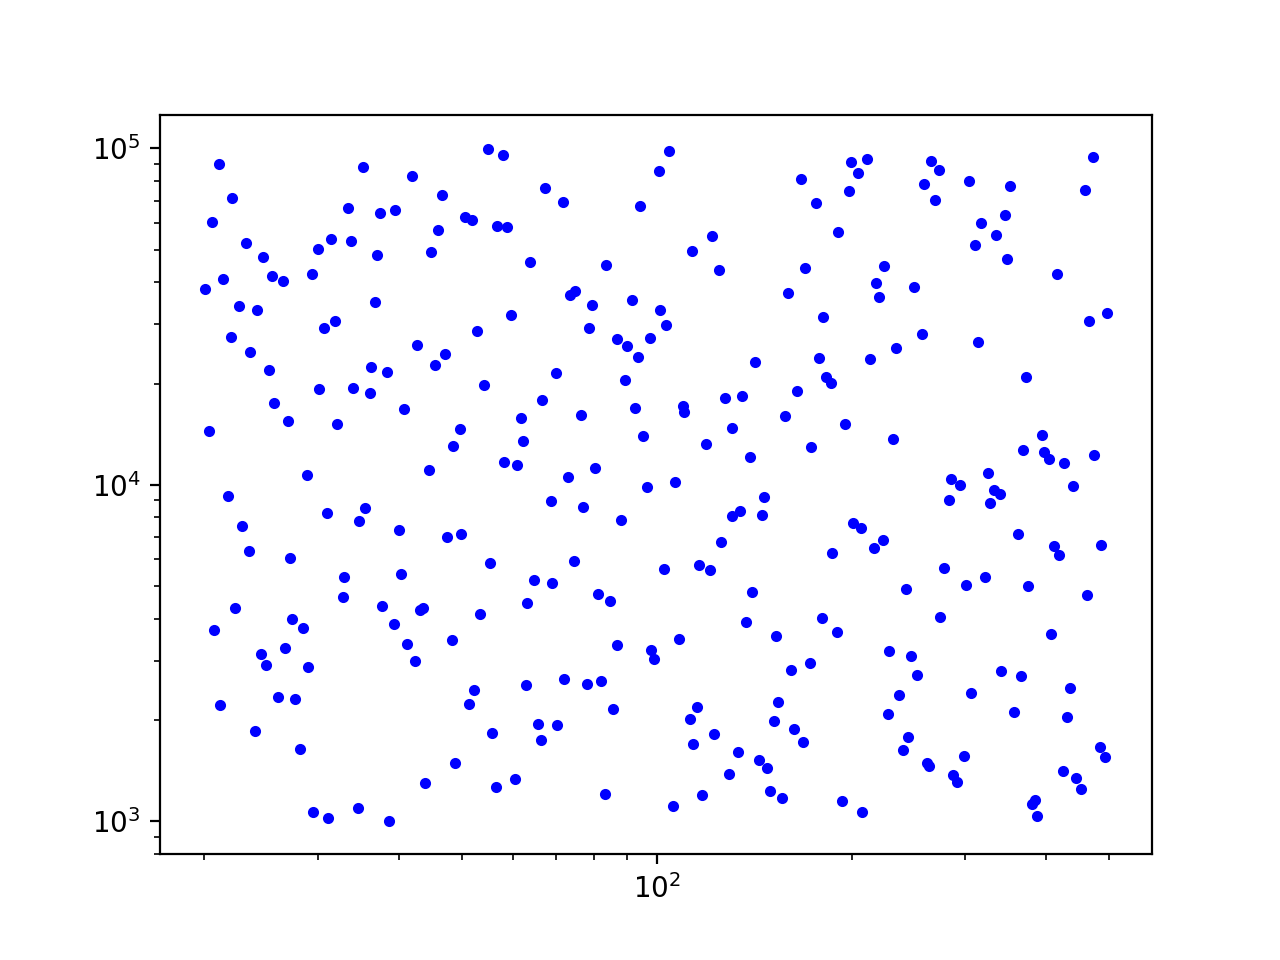

<IPython.core.display.Javascript object>


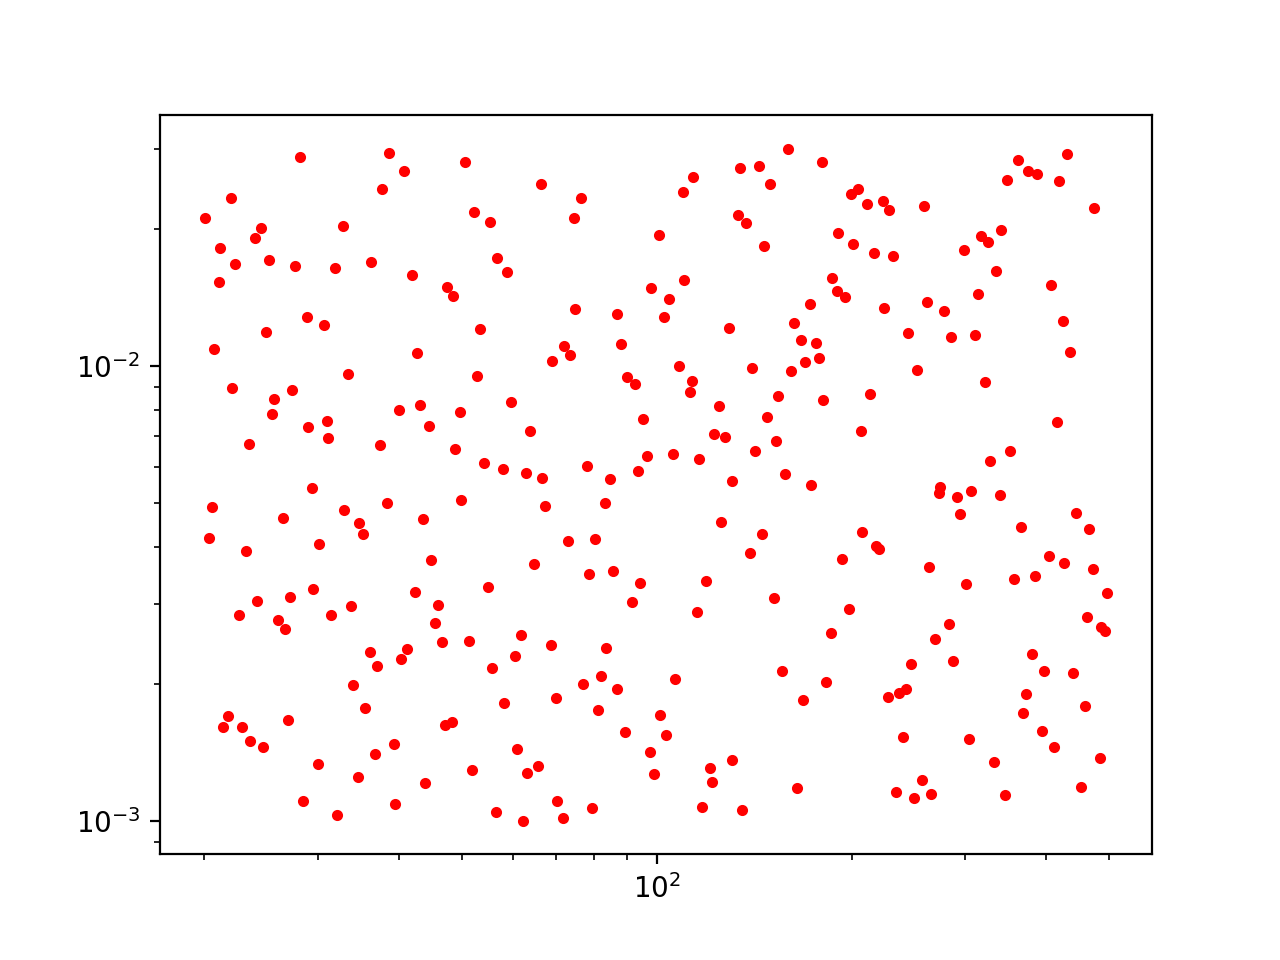

<IPython.core.display.Javascript object>


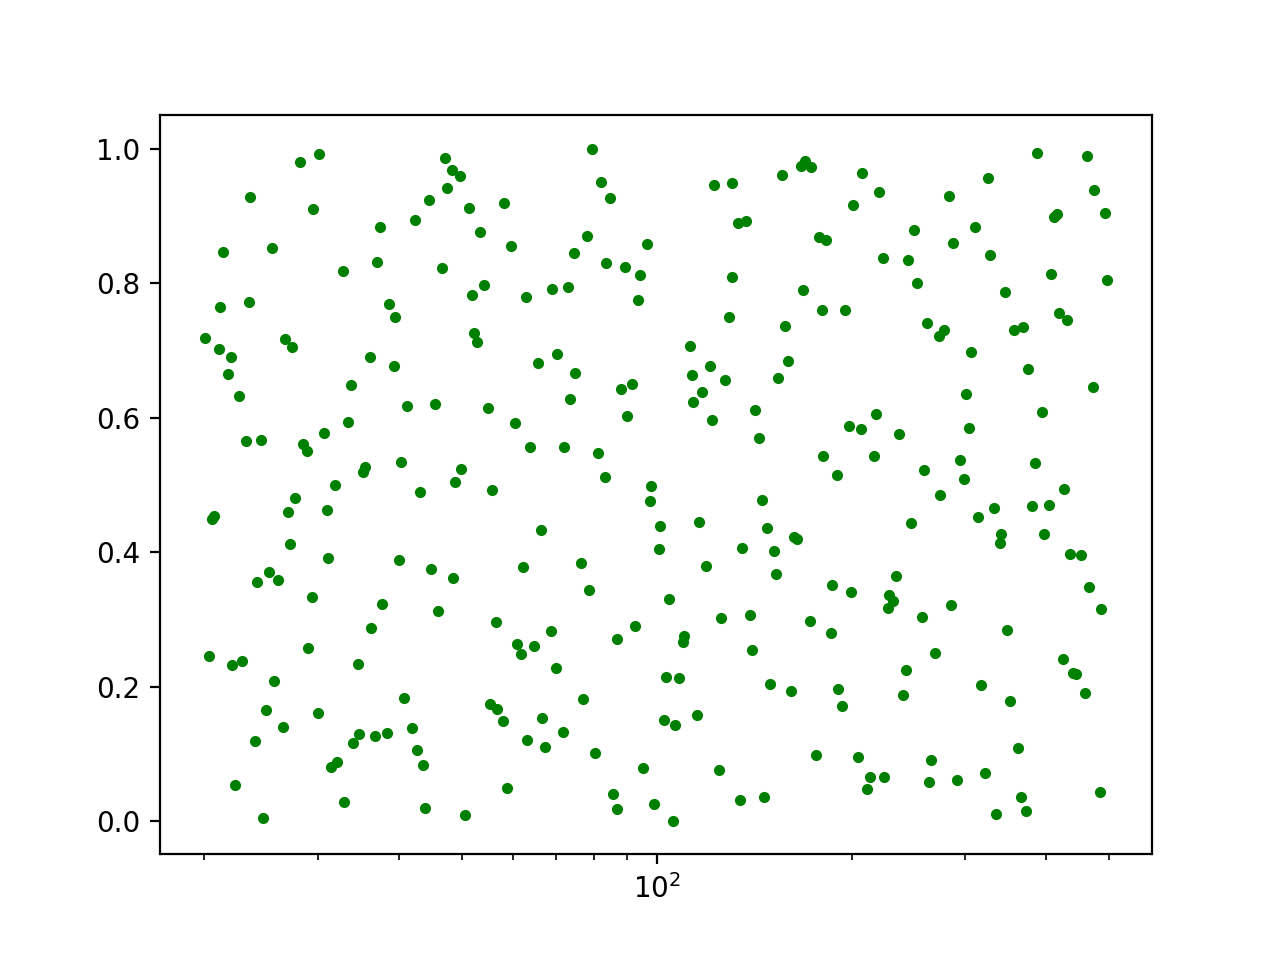

[]

In [19]:
plt.figure()
plt.plot( param_sample[:,1], param_sample[:,4], 'b.' )
plt.loglog()

plt.figure()
plt.plot( param_sample[:,1], param_sample[:,3], 'r.' )
plt.loglog()

plt.figure()
plt.plot( param_sample[:,1], param_sample[:,5], 'g.' )
plt.semilogx()